In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=sns.load_dataset("iris")

In [3]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [4]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
enc=LabelEncoder()
df["species"]=enc.fit_transform(df["species"])

In [9]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [10]:
df=df[["sepal_length","petal_length","species"]]

In [11]:
df

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [12]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
ovr=LogisticRegression(multi_class="ovr")

In [16]:
ovr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [17]:
y_pred=ovr.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [19]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


## Prediction

In [24]:
query=np.array([[3.4,2.7]])

In [25]:
ovr.predict_proba(query)

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.44391859, 0.55507579, 0.00100562]])

In [27]:
ovr.predict(query)

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal length')

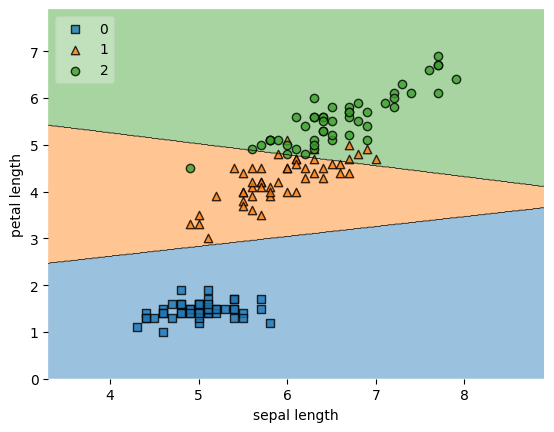

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,ovr,legend=2)
plt.xlabel("sepal length")
plt.ylabel("petal length")
